System to solve:
0: x^5 + y^5 - y^2
1: y^3 + x^5*y + x + 1


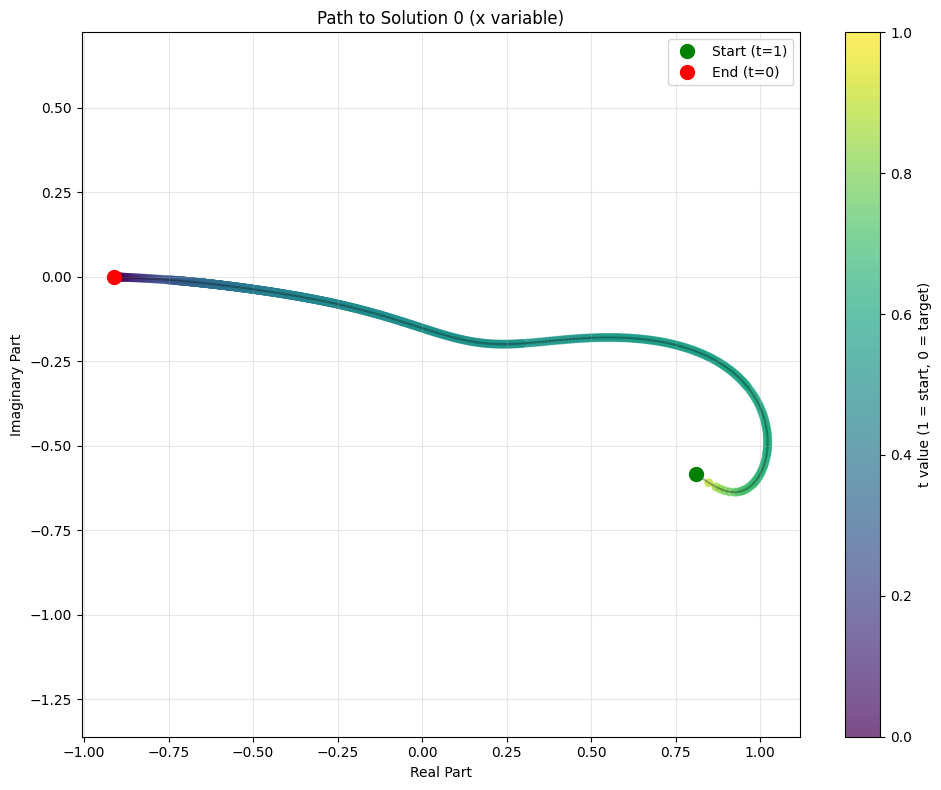


Found 30 solutions:

Solution 1:
Solution (regular, residual=2.20e-12):
  x = 1.0777005
  y = -0.91030848

Solution 2:
Solution (regular, residual=2.14e-12):
  x = 1.0092398 + 0.7913573j
  y = 1.4019684 + 0.038367584j

Solution 3:
Solution (regular, residual=8.41e-12):
  x = -0.46531168 + 1.099522j
  y = 1.3263758 + 0.079722262j

Solution 4:
Solution (regular, residual=7.20e-15):
  x = -1.0840893
  y = 1.250833

Solution 5:
Solution (regular, residual=7.61e-12):
  x = -0.46531168 + -1.099522j
  y = 1.3263758 + -0.079722262j

Solution 6:
Solution (regular, residual=7.53e-13):
  x = 0.19914587 + -1.0043143j
  y = -0.83553851 + 0.15975567j

Solution 7:
Solution (regular, residual=2.43e-13):
  x = 1.2604022 + 0.28433029j
  y = -0.71681765 + 1.215218j

Solution 8:
Solution (regular, residual=1.56e-13):
  x = 0.034755359 + 1.23308j
  y = -0.74433309 + 1.1392087j

Solution 9:
Solution (regular, residual=2.05e-13):
  x = 0.63990327 + 0.8380732j
  y = 0.53493357 + -0.70503596j

Solution 10:
So

In [4]:
from pycontinuum import PolynomialSystem, solve, polyvar
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 1. Define variables
x, y = polyvar('x', 'y')

# 2. Define equations
equation1 = x**5 + y**5 - y**2
equation2 = y**3 + x**5*y + x + 1


# 3. Create the polynomial system
system = PolynomialSystem([equation1, equation2])
print("System to solve:")
print(system)

# 4. Solve the system with path tracking
solutions = solve(system, store_paths=True)

# Visualize a solution path
if solutions[0].path_points:
    from pycontinuum.visualization import plot_path
    fig = plot_path(solutions[0].path_points, var_idx=0, 
                  title=f"Path to Solution 0 (x variable)")
    plt.show()

# 5. Display results
print(f"\nFound {len(solutions)} solutions:")
for i, sol in enumerate(solutions):
    print(f"\nSolution {i+1}:")
    print(sol)

# 6. Filter real solutions
real_solutions = solutions.filter(real=True)
print(f"\nReal solutions: {len(real_solutions)}")
print(real_solutions)

In [3]:
from pycontinuum import polyvar, PolynomialSystem, solve
import numpy as np
import matplotlib.pyplot as plt

# Create a simple polynomial system
x, y = polyvar('x', 'y')

# Simple system with a few solutions
equation1 = x**2 + y**2 - 2  # Circle
equation2 = y - x**2      # Parabola

system = PolynomialSystem([equation1, equation2])
print("System to solve:")
print(system)

# Solve the system with path tracking
solutions = solve(system)

# Visualize solution paths using the library's built-in visualization
if solutions[0].path_points:
    from pycontinuum.visualization import plot_path
    
    # Plot path for the first solution (x variable)
    fig1 = plot_path(solutions[0].path_points, var_idx=0, 
                    title="Path to Solution 0 (x variable)")
    plt.show()
    
    # Plot path for the first solution (y variable)
    fig2 = plot_path(solutions[0].path_points, var_idx=1, 
                    title="Path to Solution 0 (y variable)")
    plt.show()

# Print real solutions
print("\nReal solutions:")
print(solutions.filter(real=True))

System to solve:
0: x^2 + y^2 - 2
1: y - x^2

Real solutions:
SolutionSet: 2 solutions (2 real, 0 singular)
Tracked 4 paths, found 2 distinct solutions
Solve time: 0.39 seconds

Solution (regular, residual=8.46e-14):
  x = 1
  y = 1

Solution (regular, residual=8.46e-14):
  x = -1
  y = 1


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pycontinuum import polyvar, Polynomial, PolynomialSystem, solve

# Create a better test system for singularity
def create_better_singular_system():
    x, y = polyvar('x', 'y')
    
    f1 = (x - 1)**2
    f2 = y - x
    
    system = PolynomialSystem([f1, f2])
    return system, (x, y)

# Create our improved test system
system, (x, y) = create_better_singular_system()
print("Polynomial System:")
print(system)
print(f"Expected singular solution at x=1, y=1 (multiplicity 2)")

# Add debugging to the endgame implementation 
# Print statements in endgame.py's track_loop function can help see what's happening

# Solve with both methods
print("\n=== Solving WITHOUT endgame ===")
result_without_endgame = solve(system, use_endgame=False, verbose=True, tol=1e-8)
print(result_without_endgame)

print("\n=== Solving WITH endgame ===")
# Lower the endgame_start threshold to start endgame earlier
result_with_endgame = solve(system, use_endgame=True, verbose=True, tol=1e-8)
print(result_with_endgame)

# Analyze results
print("\n=== Solution Analysis ===")
print("Without endgame:")
for i, sol in enumerate(result_without_endgame):
    print(f"Solution {i+1}: x = {sol.values[x]:.8f}, y = {sol.values[y]:.8f}")
    print(f"  Singular: {sol.is_singular}, Residual: {sol.residual:.2e}")

print("\nWith endgame:")
for i, sol in enumerate(result_with_endgame):
    print(f"Solution {i+1}: x = {sol.values[x]:.8f}, y = {sol.values[y]:.8f}")
    print(f"  Singular: {sol.is_singular}, Residual: {sol.residual:.2e}")
    if hasattr(sol, 'winding_number'):
        print(f"  Winding number: {sol.winding_number}")

Polynomial System:
0: x^2 - 2*x + 1
1: y - x
Expected singular solution at x=1, y=1 (multiplicity 2)

=== Solving WITHOUT endgame ===
Variables used for solving: [x, y]
Generating total-degree start system...
Using total-degree homotopy with 2 start paths (2 * 1)
Tracking 2 paths...
Tracking 2 paths from t=1 to t=0...


  0%|          | 0/2 [00:00<?, ?it/s]

Path tracking complete: 2/2 successful paths
Processing and classifying solutions...
Found 2 distinct solutions
Solution process completed in 0.36 seconds
SolutionSet: 2 solutions (0 real, 0 singular)
Tracked 2 paths, found 2 distinct solutions
Solve time: 0.36 seconds

Solution (regular, residual=9.57e-09):
  x = 0.99991349 + 4.5651136e-05j
  y = 0.99991349 + 4.5651136e-05j

Solution (regular, residual=8.81e-09):
  x = 1.0000832 + -4.3549052e-05j
  y = 1.0000832 + -4.3549052e-05j

=== Solving WITH endgame ===
Variables used for solving: [x, y]
Generating total-degree start system...
Using total-degree homotopy with 2 start paths (2 * 1)
Tracking 2 paths...
Tracking 2 paths from t=1 to t=0...


  0%|          | 0/2 [00:00<?, ?it/s]

Potential singularity detected!
Switching to Cauchy endgame at t=1.8313525237776775e-06
Potential singularity detected!
Switching to Cauchy endgame at t=1.4046108698596006e-06
Path tracking complete: 2/2 successful paths
Processing and classifying solutions...
Found 1 distinct solutions
Solution process completed in 2.75 seconds
SolutionSet: 1 solutions (0 real, 1 singular)
Tracked 2 paths, found 1 distinct solutions
Solve time: 2.75 seconds

Solution (singular, residual=5.64e-08):
  x = 0.99978285 + 9.2464262e-05j
  y = 0.99978285 + 9.2472128e-05j

=== Solution Analysis ===
Without endgame:
Solution 1: x = 0.99991349+0.00004565j, y = 0.99991349+0.00004565j
  Singular: False, Residual: 9.57e-09
Solution 2: x = 1.00008317-0.00004355j, y = 1.00008317-0.00004355j
  Singular: False, Residual: 8.81e-09

With endgame:
Solution 1: x = 0.99978285+0.00009246j, y = 0.99978285+0.00009247j
  Singular: True, Residual: 5.64e-08
  Winding number: 2


System to solve:
0: x^3 + y^3 - x*y
1: x^2 + y^2 - y*z
2: x^2 + y^2 + x^2*z^2
Newton failed to converge at t=4.046108698593787e-07, path may be near a singularity
Newton failed to converge at t=0.0, path may be near a singularity
Switching to Cauchy endgame at t=2.1522085196097432e-05
Switching to Cauchy endgame at t=0.028132629610419558
Switching to Cauchy endgame at t=0.02802230557272641
Switching to Cauchy endgame at t=1.9509090164372844e-05
Newton failed to converge at t=3.3113734743997744e-07, path may be near a singularity
Newton failed to converge at t=0.0, path may be near a singularity
Switching to Cauchy endgame at t=0.030890730552610178
Switching to Cauchy endgame at t=1.9662705047554416e-05
Switching to Cauchy endgame at t=1.9605099466347884e-05
Switching to Cauchy endgame at t=2.1164717238688376e-05
Newton failed to converge at t=1.1071678017707938e-07, path may be near a singularity
Newton failed to converge at t=1.1071678017703025e-07, path may be near a singularity
Swit

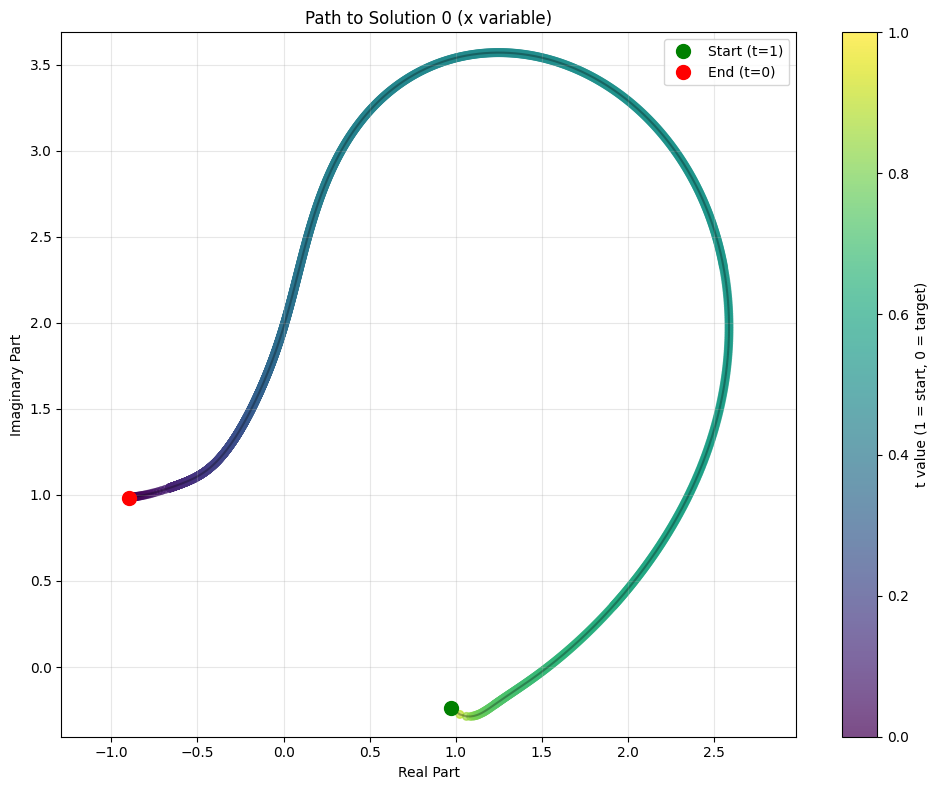


Found 14 solutions:

Solution 1:
Solution (regular, residual=2.32e-12):
  x = -0.90074329 + 0.98477712j
  y = -1.1304482 + -0.58115255j
  z = -0.38145132 + 0.60313997j

Solution 2:
Solution (singular, residual=3.74e-10):
  x = 0.00046823501 + 0.00013633238j
  y = 1.2761217e-07 + -2.0100901e-07j
  z = -3.683476e-05 + 0.99965661j

Solution 3:
Solution (singular, residual=3.40e-10):
  x = 0.00032661282 + 0.00034112833j
  y = -2.2278008e-07 + -9.3736852e-09j
  z = 0.00030511713 + -0.99986517j

Solution 4:
Solution (regular, residual=2.32e-13):
  x = 0.12411094 + -0.77775783j
  y = -0.4705818 + 0.79170295j
  z = -0.32372927 + 1.4490171j

Solution 5:
Solution (regular, residual=2.53e-13):
  x = 0.12411094 + 0.77775783j
  y = -0.4705818 + -0.79170295j
  z = -0.32372927 + -1.4490171j

Solution 6:
Solution (regular, residual=1.33e-13):
  x = 0.27663235 + 0.91026053j
  y = 1.10103 + 0.497087j
  z = 0.70518059 + 1.1332065j

Solution 7:
Solution (singular, residual=3.42e-10):
  x = -0.00034183211

In [2]:
from pycontinuum import PolynomialSystem, solve, polyvar
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 1. Define variables
x, y, z = polyvar('x', 'y', 'z')

# 2. Define equations
equation1 = x**3 + y**3 - x*y
equation2 = x**2 + y**2 - z*y
equation3 = 4*x + 4*y + 4*z


# 3. Create the polynomial system
system = PolynomialSystem([equation1, equation2, equation3])
print("System to solve:")
print(system)

# 4. Solve the system with path tracking
solutions = solve(system, store_paths=True)

# Visualize a solution path
if solutions[0].path_points:
    from pycontinuum.visualization import plot_path
    fig = plot_path(solutions[0].path_points, var_idx=0, 
                  title=f"Path to Solution 0 (x variable)")
    plt.show()

# 5. Display results
print(f"\nFound {len(solutions)} solutions:")
for i, sol in enumerate(solutions):
    print(f"\nSolution {i+1}:")
    print(sol)

# 6. Filter real solutions
real_solutions = solutions.filter(real=True)
print(f"\nReal solutions: {len(real_solutions)}")
print(real_solutions)